# Time Series Analysis

In [28]:
!pip install pandas
!pip install statsmodels
!pip install scikit-learn

In [1]:
# Imports
import pandas as pd


In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('city_day.csv')

# Display the first few rows of the DataFrame
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Preprocess and Clean the data

In [14]:
data = df.dropna()
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


# Visualize the data

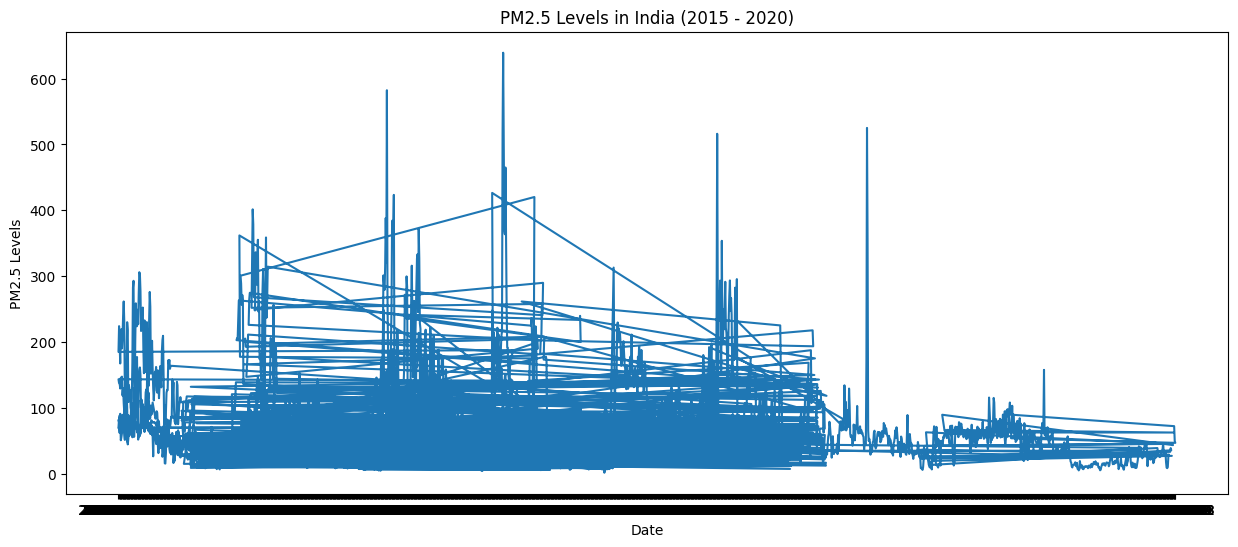

In [15]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['PM2.5'])
plt.title('PM2.5 Levels in India (2015 - 2020)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.show()


# Time Series Analysis

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Perform forecasting
model = ExponentialSmoothing(data['PM2.5'], trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()

# Make predictions
predictions = result.predict(start=len(data), end=len(data)+12)

# Show the summary of the model
print(result.summary())

/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    PM2.5   No. Observations:                 6236
Model:             ExponentialSmoothing   SSE                        4113599.324
Optimized:                         True   AIC                          40514.333
Trend:                         Additive   BIC                          40622.143
Seasonal:                      Additive   AICC                         40514.443
Seasonal Periods:                    12   Date:                 Mon, 13 May 2024
Box-Cox:                          False   Time:                         15:38:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7819741                alpha                 True
smoothing_trend          

/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Evaluate the model


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(data['PM2.5'], result.fittedvalues)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data['PM2.5'], result.fittedvalues))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 13.748105810512328
Root Mean Squared Error (RMSE): 25.683720830466815
